## Goal

It appears we have lots of point data within the medical field, this makes some forms of machine learning unusable do to the nature and sparsity of the data. Can we make assumptions about the data, which will allow us to perform machine learning models on continuous data. 

Aspirationally I want to take a model in a sparse space, give it a starting position, and have the model give an accurate path (ie probability of death or recovery

## Example data

Say for instance, we have a study of 9 patients who have a disease, and from diagnosis to death they die at different months. We could choose to plot the proportion of people alive after a give number of months, and take this as a proxy for the likelihood of being alive after a given number of months.

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt

Text(0.5, 0, 'Months after diagnosis')

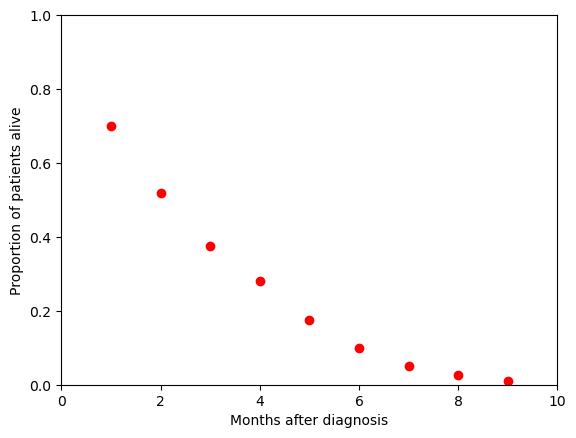

In [2]:
plt.scatter(1, 0.7, color="r") 
plt.scatter(2, 0.52, color="r")
plt.scatter(3, 0.375, color="r")
plt.scatter(4, 0.28, color="r")
plt.scatter(5, 0.175, color="r")
plt.scatter(6, 0.1, color="r")
plt.scatter(7, 0.05, color="r")
plt.scatter(8, 0.025, color="r")
plt.scatter(9, 0.01, color="r")
plt.ylim((0, 1))
plt.xlim((0, 1/0.1))
plt.ylabel("Proportion of patients alive")
plt.xlabel("Months after diagnosis")

## 1st idea : aggregate of straight lines
What if we drew straigh lines through these data points? Could a feed forward net agregate the error to give an approximation of the curve we see? If these patients had other different variables, could this allow us to model higher dimensional spaces with the sparse data?

In [3]:
def y1(x):
    x = np.array(x)
    result = np.maximum(1 - 0.30000000000000004 * x, 0.0001)
    return result

def y2(x):
    x = np.array(x)
    return np.maximum(1 - 0.24 * x, 0)

def y3(x):
    x = np.array(x)
    return np.maximum(1 - 0.20833333333333334 * x, 0.0011)

def y4(x):
    x = np.array(x)
    return np.maximum(1 - 0.18125 * x, 0)

def y5(x):
    x = np.array(x)
    return np.maximum(1 - 0.16599999999999998 * x, 0.001)

def y6(x):
    x = np.array(x)
    return np.maximum(1 - 0.15 * x, 0)

def y7(x):
    x = np.array(x)
    return np.maximum(1 - 0.1357142857142857 * x, 0)

def y8(x):
    x = np.array(x)
    return np.maximum(1 - 0.121875 * x, 0.001)

def y9(x):
    x = np.array(x)
    return np.maximum(1  -0.11 * x, 0)


k = np.linspace(0, 1/0.11, 1000)


y1_values = y1(k)
y2_values = y2(k)
y3_values = y3(k)
y4_values = y4(k)
y5_values = y5(k)
y6_values = y6(k)
y7_values = y7(k)
y8_values = y8(k)
y9_values = y9(k)

iv = np.concatenate((y1_values[:-1], y2_values[:-1], y3_values[:-1], y4_values[:-1], y5_values[:-1] ,y6_values[:-1], y7_values[:-1], y8_values[:-1], y9_values[:-1]))
it = np.concatenate((k[:-1], k[:-1], k[:-1], k[:-1], k[:-1], k[:-1], k[:-1], k[:-1],k[:-1]))
tv = np.concatenate((y1_values[1:], y2_values[1:], y3_values[1:], y4_values[1:], y5_values[1:] ,y6_values[1:], y7_values[1:], y8_values[1:], y9_values[1:]))
#X = np.array([iv],[it])


X = np.vstack([iv.flatten(), it.flatten()])
Y = tv

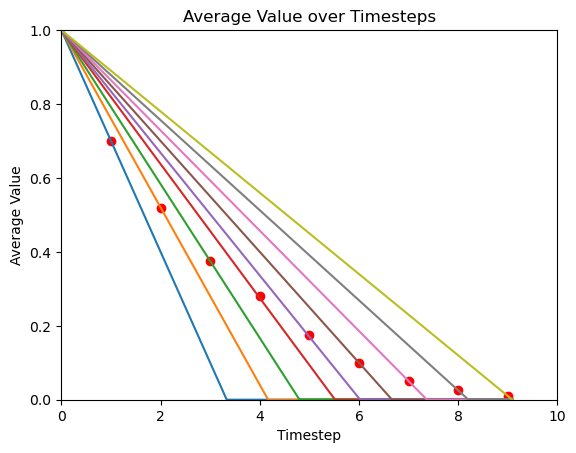

In [4]:
plt.scatter(1, 0.7, color="r") 
plt.scatter(2, 0.52, color="r")
plt.scatter(3, 0.375, color="r")
plt.scatter(4, 0.28, color="r")
plt.scatter(5, 0.175, color="r")
plt.scatter(6, 0.1, color="r")
plt.scatter(7, 0.05, color="r")
plt.scatter(8, 0.025, color="r")
plt.scatter(9, 0.01, color="r")
plt.ylim((0, 1))
plt.xlim((0, 1/0.1))
plt.plot(k, y1_values, label='y1(x)')
plt.plot(k, y2_values, label='y2(x)')
plt.plot(k, y3_values, label='y3(x)')
plt.plot(k, y4_values, label='y4(x)')
plt.plot(k, y5_values, label='y5(x)')
plt.plot(k, y6_values, label='y6(x)')
plt.plot(k, y7_values, label='y7(x)')
plt.plot(k, y8_values, label='y8(x)')
plt.plot(k, y9_values, label='y9(x)')
plt.xlabel('Timestep')
plt.ylabel('Average Value')
plt.title('Average Value over Timesteps')


plt.show()

Below we take the average on the y axis at every time step and plot the result.

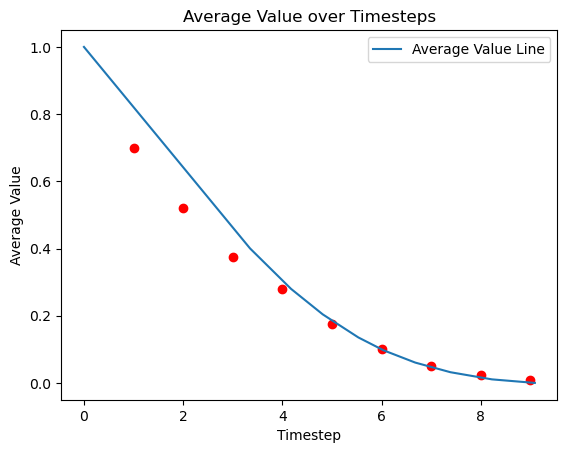

In [5]:
def average_value_at_timestep(timestep, functions):
    values = [max(0, func(timestep)) for func in functions]
    average_value = np.mean(values)
    return average_value

# Define the list of functions
functions = [
    lambda x: 1 - 0.30000000000000004 * x,
    lambda x: 1 - 0.24 * x,
    lambda x: 1 - 0.20833333333333334 * x,
    lambda x: 1 - 0.18125 * x,
    lambda x: 1 - 0.16599999999999998 * x,
    lambda x: 1 - 0.15 * x,
    lambda x: 1 - 0.1357142857142857 * x,
    lambda x: 1 - 0.121875 * x,
    lambda x: 1 - 0.11 * x
]

# Define the range of timesteps
k = np.linspace(0, 1/0.11, 1000)

# Calculate the average value for each timestep
average_values = [average_value_at_timestep(timestep, functions) for timestep in k]


plt.plot(k, average_values, label='Average Value Line')
plt.scatter(1, 0.7, color="r")  # Add red dot at (1, 0.7)
plt.scatter(2, 0.52, color="r")
plt.scatter(3, 0.375, color="r")
plt.scatter(4, 0.28, color="r")
plt.scatter(5, 0.175, color="r")
plt.scatter(6, 0.1, color="r")
plt.scatter(7, 0.05, color="r")
plt.scatter(8, 0.025, color="r")
plt.scatter(9, 0.01, color="r")

plt.xlabel('Timestep')
plt.ylabel('Average Value')
plt.title('Average Value over Timesteps')
plt.legend()
plt.show()

Looks like if the model can average the straight lines it may return a good approximation of the data. Now we see if a simple feed forward network will perform something similar.

0


2024-01-11 20:44:04.762409: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1
2
3
4
5


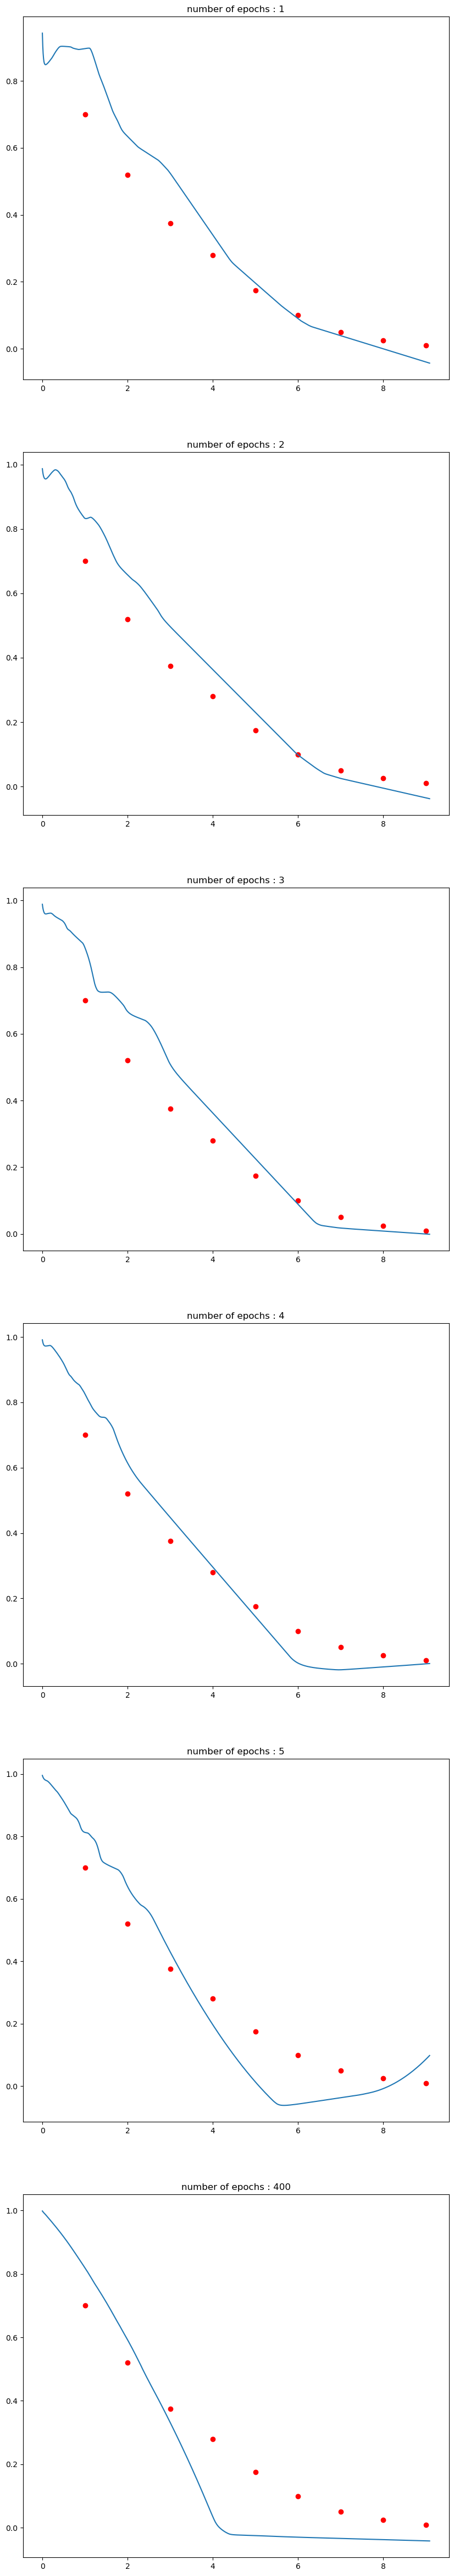

In [6]:
# would not advise running this code

fig, axs = plt.subplots(6,1, figsize=(10, 60))

epochsl = [1, 2, 3, 4, 5, 400]

for c in range(6):
    print(c)
    model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])


    model.compile(optimizer='adam', loss='mean_squared_error')


    model.fit(X.T, Y, epochs=epochsl[c], batch_size=32, validation_split=0.1, verbose=0)


    def predict_single_input(model, input_data):
        input_data = np.array(input_data).reshape(1, -1)
        prediction = model.predict(input_data, verbose=0)
        return prediction[0]

    new_input = [1, 0]

    set_of_predict = []

    for i in k:
        new_input[1] = i
        prediction = predict_single_input(model, new_input)
        new_input[0] = prediction[0]
        set_of_predict.append(prediction)
    
    axs[c].scatter(1, 0.7, color="r")  # Add red dot at (1, 0.7)
    axs[c].scatter(2, 0.52, color="r")
    axs[c].scatter(3, 0.375, color="r")
    axs[c].scatter(4, 0.28, color="r")
    axs[c].scatter(5, 0.175, color="r")
    axs[c].scatter(6, 0.1, color="r")
    axs[c].scatter(7, 0.05, color="r")
    axs[c].scatter(8, 0.025, color="r")
    axs[c].scatter(9, 0.01, color="r")
    axs[c].plot(k, set_of_predict)
    axs[c].set_title("number of epochs : {}".format( epochsl[c]))

It looks like we converge to the points and then begin to overfit to the straight lines as defined. It also looks probable with hyperparamterisation and saving models and stopping at local minimums of accuracy close to the real data points, we could achive better accuracy. 

Can we have a better approximation by using curves closer to what we expect the real relationship between probability of being alive and time?

Were one to do this in a real data you would not eyeball random curves close to the data as I have done but you would do something similar to monte carlo simulation, ie making many random curves based on most likely parameters.

In [7]:
def m1(x):
    return np.maximum(0, np.exp(0.4*(-1*x)) - 0.001*x)

def m2(x):
    return np.maximum(0, np.exp(0.3*(-1*x)) - 0.003*x)

def m3(x):
    return np.maximum(0, np.exp(0.25*(-1*x)) - 0.001*x)

def m4(x):
    return np.maximum(0, np.exp(0.15*(-1*x)) - 0.1*x)

def m5(x):
    return np.maximum(0, np.exp(0.5*(-1*x)) - 0.001*x)
    
k = np.linspace(0, 1/0.11, 1000)    

c1 = m1(k)
c2 = m2(k)
c3 = m3(k)
c4 = m4(k)
c5 = m5(k)

iv = np.concatenate((c1[:-1], c2[:-1], c3[:-1], c4[:-1], c5[:-1]))
it = np.concatenate((k[:-1], k[:-1], k[:-1], k[:-1], k[:-1]))
tv = np.concatenate((c1[1:], c2[1:], c3[1:], c4[1:], c5[1:]))



X = np.vstack([iv.flatten(), it.flatten()])
Y = tv

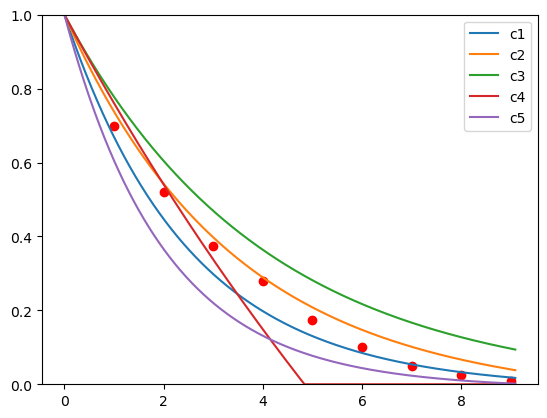

In [8]:
plt.ylim((0, 1))
plt.scatter(1, 0.7, color="r")  
plt.scatter(2, 0.52, color="r")
plt.scatter(3, 0.375, color="r")
plt.scatter(4, 0.28, color="r")
plt.scatter(5, 0.175, color="r")
plt.scatter(6, 0.1, color="r")
plt.scatter(7, 0.05, color="r")
plt.scatter(8, 0.025, color="r")
plt.scatter(9, 0.01, color="r")
plt.plot(k, c1, label='c1')
plt.plot(k, c2, label='c2')
plt.plot(k, c3, label='c3')
plt.plot(k, c4, label='c4')
plt.plot(k, c5, label='c5')
plt.legend()
plt.show()

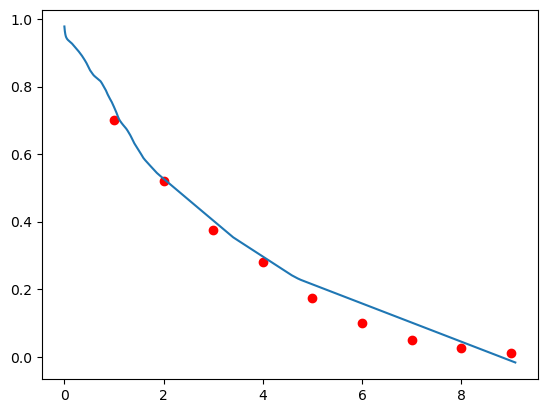

In [9]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with your data
model.fit(X.T, Y, epochs=4, batch_size=32, validation_split=0.5,  verbose=0)

# Predict function
def predict_single_input(model, input_data):
    # Reshape the input_data to match the model's input shape
    input_data = np.array(input_data).reshape(1, -1)
    
    # Make the prediction
    prediction = model.predict(input_data, verbose=0)
    
    return prediction[0]

new_input = [1, 0]

set_of_predict = []

for i in k:
    new_input[1] = i
    prediction = predict_single_input(model, new_input)
    new_input[0] = prediction[0]
    set_of_predict.append(prediction)
    
plt.plot(k, set_of_predict)
plt.scatter(1, 0.7, color="r")  
plt.scatter(2, 0.52, color="r")
plt.scatter(3, 0.375, color="r")
plt.scatter(4, 0.28, color="r")
plt.scatter(5, 0.175, color="r")
plt.scatter(6, 0.1, color="r")
plt.scatter(7, 0.05, color="r")
plt.scatter(8, 0.025, color="r")
plt.scatter(9, 0.01, color="r")

Using the inverse exponentials we achieve much better convergence, however we are imposing a structure on the data. We therefore shall attempt again using an aggregate of linear step functions in a higher dimensional space. 

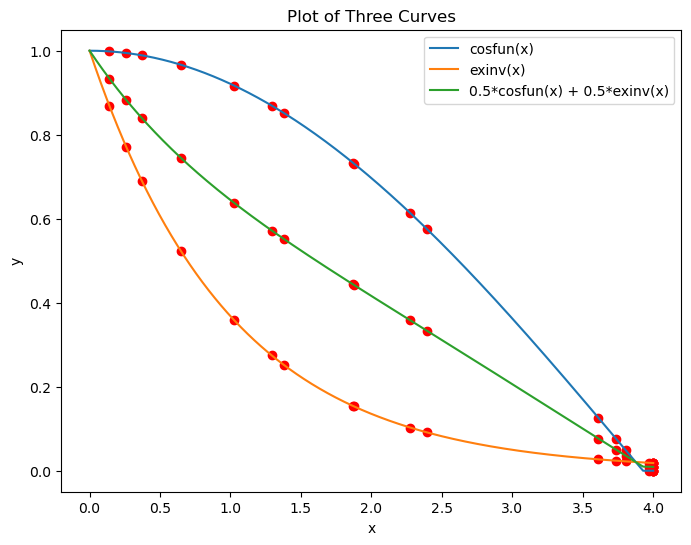

In [10]:
def cosfun(x):
    return np.maximum(0, np.cos(x/2.5))

def exinv(x):
    return np.maximum(0, np.exp(-1*x))

def mix(x, m1, m2):
    return m1*cosfun(x) + m2*exinv(x)

x_values = np.linspace(0, 4, 1000)

## creating a set of random points 

random_subset = np.random.choice(x_values, size=15, replace=False)

for i in range(5):
    random_subset = np.concatenate((random_subset, [4]))

# Calculate y values for each function
y_cosfun = cosfun(x_values)
y_exinv = exinv(x_values)
y_mix = mix(x_values, 0.5, 0.5)


# Plotting
plt.figure(figsize=(8, 6))

plt.plot(x_values, y_cosfun, label='cosfun(x)')
plt.plot(x_values, y_exinv, label='exinv(x)')
plt.plot(x_values, y_mix, label='0.5*cosfun(x) + 0.5*exinv(x)')
plt.scatter(random_subset, cosfun(random_subset), color='r')
plt.scatter(random_subset, exinv(random_subset), color='r')
plt.scatter(random_subset, mix(random_subset, 0.5, 0.5), color='r')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Three Curves')
plt.legend()

# Display the plot
plt.show()

In [11]:
def calculate_slope_intercept(x, y):
    slope = (y - 1) / (x)

    intercept = y - slope * x

    return slope, intercept


x_extend = np.concatenate((x_values, [4.004004004004004004]))

# make 2 lists 1) of the points and 2) of the y values
y1 = mix(random_subset, 1, 0)
y2 = mix(random_subset, 0.75, 0.25)
y3 = mix(random_subset, 0.5, 0.5)
y4 = mix(random_subset, 0, 1)

t1 = []
t1t = []

t2 = []
t2t = []

t3 = []
t3t = []

t4 = []
t4t = []


for i in range(len(y1)):
    a, b = calculate_slope_intercept(random_subset[i], y1[i])
    temp_fun = lambda a, b, x :np.minimum(np.maximum(b + a*x, 0), 1)
    t1.append(temp_fun(a, b, x_extend))
    t1t.append(temp_fun(a, b, x_extend))
    t1[i] = t1[i][:-1]
    t1t[i] = t1t[i][1:]
t1 = np.concatenate(t1)
t1t = np.concatenate(t1t)


for i in range(len(y2)):
    a, b = calculate_slope_intercept(random_subset[i], y1[i])
    temp_fun = lambda a, b, x : np.minimum(np.maximum(b + a*x, 0), 1)
    t2.append(temp_fun(a, b, x_extend))
    t2t.append(temp_fun(a, b, x_extend))
    t2[i] = t2[i][:-1]
    t2t[i] = t2t[i][1:]
t2 = np.concatenate(t2)
t2t = np.concatenate(t2t)


for i in range(len(y3)):
    a, b = calculate_slope_intercept(random_subset[i], y1[i])
    temp_fun = lambda a, b, x : np.minimum(np.maximum(b + a*x, 0), 1)
    t3.append(temp_fun(a, b, x_extend))
    t3t.append(temp_fun(a, b, x_extend))
    t3[i] = t3[i][:-1]
    t3t[i] = t3t[i][1:]
t3 = np.concatenate(t3)
t3t = np.concatenate(t3t)


for i in range(len(y4)):
    a, b = calculate_slope_intercept(random_subset[i], y1[i])
    temp_fun = lambda a, b, x : np.minimum(np.maximum(b + a*x, 0), 1)
    t4.append(temp_fun(a, b, x_extend))
    t4t.append(temp_fun(a, b, x_extend))
    t4[i] = t4[i][:-1]
    t4t[i] = t4t[i][1:]
t4 = np.concatenate(t4)
t4t= np.concatenate(t4t)

x = np.concatenate((x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values,x_values))

x1 = np.array(([1 for i in range(20000)], [0 for i in range(20000)],x, t1))
x2 = np.array(([0.75 for i in range(20000)], [0.25 for i in range(20000)],x, t2))
x3 = np.array(([0.5 for i in range(20000)], [0.5 for i in range(20000)], x, t3))
x4 = np.array(([0 for i in range(20000)], [1 for i in range(20000)], x, t4))

x_all = np.column_stack((x1, x2, x3, x4))
t_all = np.concatenate((t1t, t2t, t3t, t4t)).T


In [12]:
from keras.optimizers import Adam
custom_optimizer = Adam(learning_rate=0.000001)

model = keras.Sequential([
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(228, activation='relu'),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='MAE')

# Train the model with your data
model.fit(x_all.T, t_all, epochs=3, batch_size=1, validation_split=0.75)

# Predict function
def predict_single_input(model, input_data):
    # Reshape the input_data to match the model's input shape
    input_data = np.array(input_data).reshape(1, -1)
    
    # Make the prediction
    prediction = model.predict(input_data, verbose=0)
    
    return np.minimum(np.minimum(prediction[0], np.maximum(np.cos(input_data[0][-2]/2.5), 0)), input_data[0][-1])

Epoch 1/3
20000/20000 [==============================] - 16s 806us/step - loss: 0.0317 - val_loss: 0.0202
Epoch 2/3
20000/20000 [==============================] - 16s 805us/step - loss: 0.0096 - val_loss: 0.0387
Epoch 3/3
20000/20000 [==============================] - 16s 806us/step - loss: 0.0079 - val_loss: 0.0360


we now check how the ff network models the different curves.

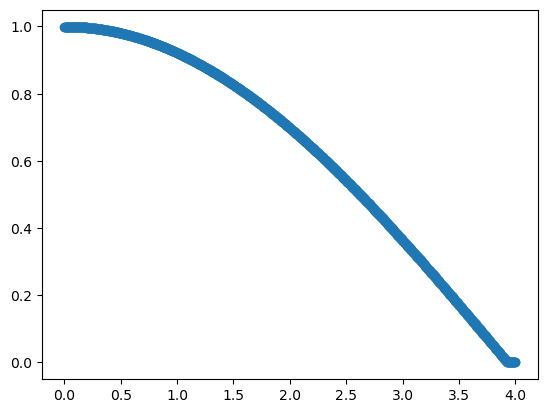

In [15]:
new_input = [0, 1, 0, 1]

set_of_predict = []

for i in x_values:
    
    prediction = predict_single_input(model, new_input)
    new_input[3] = max(min(1,prediction[0]), 0)
    set_of_predict.append(prediction[0])
    new_input[2] = i   
    
plt.scatter(x_values, set_of_predict)
plt.plot(x_values, y_cosfun, label='cosfun(x)')

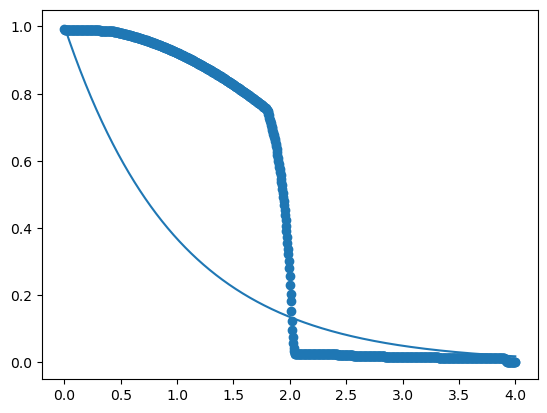

In [16]:
new_input = [1, 0, 0, 1]

set_of_predict = []

for i in x_values:
    
    prediction = predict_single_input(model, new_input)
    new_input[3] = max(min(1,prediction[0]), 0)
    set_of_predict.append(prediction[0])
    new_input[2] = i
    
plt.scatter(x_values, set_of_predict)
plt.plot(x_values, y_exinv, label='exinv(x)')

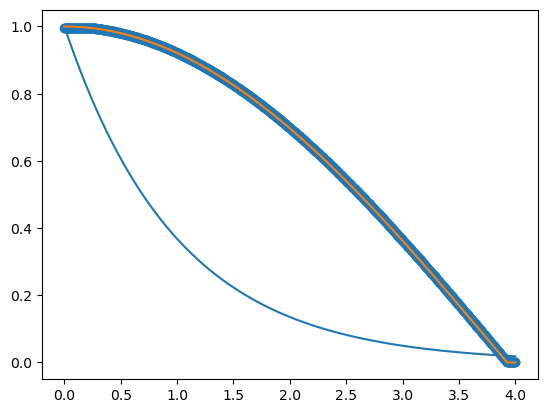

In [17]:
# this should plot a line in the middle

new_input = [0.5, 0.5, 0, 1]

set_of_predict = []

for i in x_values:
    
    prediction = predict_single_input(model, new_input)
    new_input[3] = max(min(1,prediction[0]), 0)
    set_of_predict.append(prediction[0])
    new_input[2] = i
    
plt.scatter(x_values, set_of_predict)
plt.plot(x_values, y_exinv, label='exinv(x)')
plt.plot(x_values, y_cosfun, label='cosfun(x)')

So overall the model performs very poorly in higher dimensions, especially considering we have highly restricted its outputs.